In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_PER_MONTHLY.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5015개**

In [3]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [4]:
len(stock_name_ls)

5015

## **보통주만 선별하는 작업 필요**

In [5]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 16개 기업 제거**

In [35]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트',
                  '아이티센', '에스와이코퍼레이션']

In [36]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [6]:
def clean_uncommon_stocks(stock_name_ls):
    # 보통주 외에 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    # 우선주 제거
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [15]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2916

# 성과지표 데이터프레임 전처리 수행

In [39]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

/home/donghyungko/anaconda3/envs/fininsight_python3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [40]:
len(per_df)

2900

# 수익률 DF 전처리

In [41]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [13]:
rt_df.loc['조흥은행'].iloc[173:178]

20040630    0.8571
20040731    1.0000
20040831    0.0000
20040930       NaN
20041031       NaN
Name: 조흥은행, dtype: float64

In [14]:
len(rt_df)

2900

In [15]:
import math

In [16]:
rt_ls = [x for row in rt_df.values for x in row if not math.isnan(x)]

/home/donghyungko/anaconda3/envs/fininsight_python3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


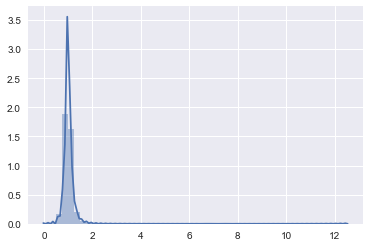

In [17]:
sns.distplot(rt_ls)

In [18]:
max_ls = sorted(rt_df.max(), reverse = True)[:10]

In [19]:
rt_df[rt_df == max_ls[4]].dropna(how = 'all').dropna(axis = 1)

,20000331
흥구석유,9.7639


# 포트폴리오 구성 수행

In [20]:
data = Ko.portfolio_selection(per_df)

In [21]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,x,4,4,4,4,4,4,4,4,4,...,x,x,x,x,x,x,x,x,x,x
동화약품,x,4,4,4,2,2,2,2,2,2,...,0,0,0,0,1,1,1,1,1,1
우리은행,x,9,9,9,9,9,9,9,9,9,...,1,1,1,1,1,1,1,1,1,1
KR모터스,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
경방,x,5,5,5,6,5,6,6,6,7,...,4,4,4,4,4,4,4,3,4,4


# 포트폴리오 성과분석

In [45]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

result

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
1990-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1990-02-28,1.006424,1.001530,0.991302,0.997906,0.973963,0.991414,0.991666,0.976357,0.995194,0.983478
1990-03-31,0.972800,0.983863,0.967022,0.970149,0.965698,0.989237,0.968547,0.981892,0.967614,0.985927
1990-04-30,0.876488,0.859071,0.858138,0.851906,0.834019,0.848400,0.853467,0.829631,0.841951,0.836958
1990-05-31,1.070812,1.083055,1.071998,1.088706,1.073629,1.101251,1.076845,1.096081,1.086149,1.111056
1990-06-30,0.921504,0.902900,0.897286,0.900337,0.886819,0.896571,0.887835,0.865398,0.876402,0.844837
1990-07-31,0.937753,0.924138,0.934888,0.919117,0.947204,0.918525,0.912952,0.951290,0.922798,0.953096
1990-08-31,0.993304,0.991065,0.972636,0.949196,0.942036,0.942081,0.945560,0.939664,0.918415,0.890564
1990-09-30,0.957155,0.961550,0.966050,0.961570,0.957485,0.925175,0.940666,0.928740,0.902846,0.954157
1990-10-31,1.089124,1.114783,1.079391,1.146068,1.103183,1.127426,1.120985,1.127874,1.138045,1.164302


In [23]:
result.min()

GROUP_0    0.712824
GROUP_1    0.719651
GROUP_2    0.727574
GROUP_3    0.728361
GROUP_4    0.716450
GROUP_5    0.717655
GROUP_6    0.717344
GROUP_7    0.689383
GROUP_8    0.690521
GROUP_9    0.681019
dtype: float64

In [24]:
result.max()

GROUP_0    1.798397
GROUP_1    1.781448
GROUP_2    1.444814
GROUP_3    1.334722
GROUP_4    1.528660
GROUP_5    1.434448
GROUP_6    1.478660
GROUP_7    1.483944
GROUP_8    1.632085
GROUP_9    1.709630
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

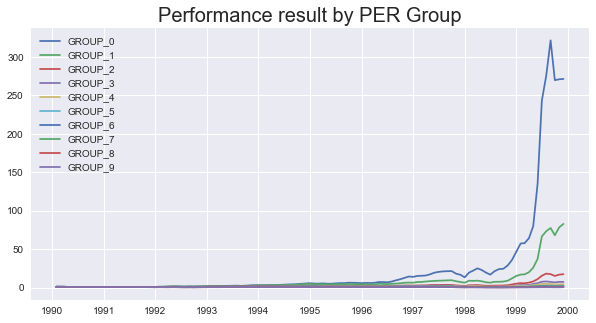

In [25]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

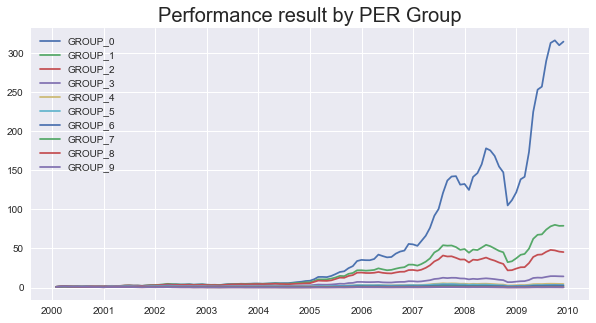

In [26]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

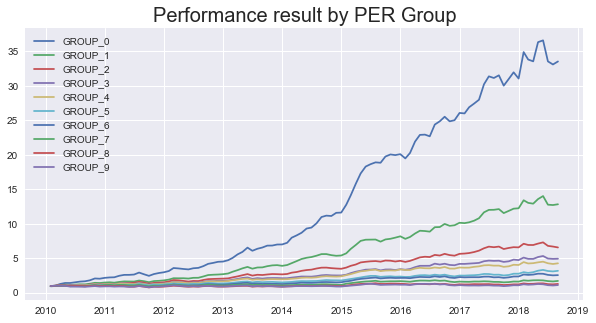

In [27]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

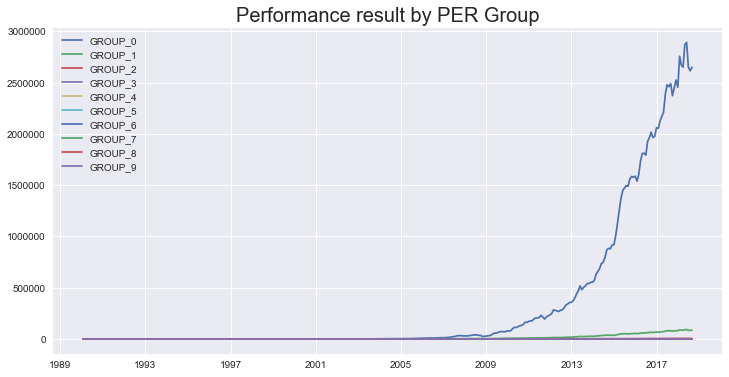

In [28]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [29]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.044,1.034,1.025,1.018,1.013,1.009,1.007,1.004,0.999,0.996
arith_mean_return,1.049,1.038,1.029,1.022,1.017,1.013,1.010,1.007,1.003,1.001
std,0.106,0.097,0.089,0.083,0.083,0.082,0.086,0.090,0.096,0.103
min,0.713,0.720,0.728,0.728,0.716,0.718,0.717,0.689,0.691,0.681
25%,0.993,0.987,0.975,0.969,0.967,0.965,0.962,0.958,0.954,0.949
50%,1.035,1.028,1.021,1.018,1.016,1.009,1.010,1.005,0.997,0.996
75%,1.098,1.076,1.064,1.061,1.059,1.057,1.055,1.049,1.051,1.056
max,1.798,1.781,1.445,1.335,1.529,1.434,1.479,1.484,1.632,1.710


In [29]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.044,1.033,1.025,1.018,1.013,1.009,1.007,1.003,0.999,0.996
arith_mean_return,1.049,1.038,1.029,1.022,1.017,1.013,1.010,1.007,1.003,1.001
std,0.106,0.097,0.089,0.083,0.083,0.082,0.086,0.090,0.096,0.103
min,0.713,0.720,0.728,0.728,0.716,0.718,0.717,0.689,0.691,0.681
25%,0.993,0.987,0.975,0.969,0.967,0.964,0.962,0.958,0.954,0.949
50%,1.034,1.028,1.021,1.017,1.016,1.009,1.010,1.005,0.997,0.996
75%,1.098,1.076,1.064,1.061,1.059,1.057,1.055,1.049,1.051,1.056
max,1.798,1.781,1.445,1.335,1.529,1.434,1.479,1.484,1.632,1.710
